# 7PAM2002 - MSc Data Science

## Sector-Wide Stock Market Prediction Using Time Series Analysis on Brazilian Equities

### Data Integration and Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset = pd.read_csv('brazallian_stocks_prediction.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29905 entries, 0 to 29904
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        29905 non-null  object 
 1   Open        29905 non-null  float64
 2   High        29905 non-null  float64
 3   Low         29905 non-null  float64
 4   Close       29905 non-null  float64
 5   Volume      29905 non-null  int64  
 6   Stock Name  29905 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Stock Name
0,2000-01-03,5.9,5.88,5.88,5.88,35389440000,PETR4.SA
1,2000-01-04,5.6,5.55,5.55,5.55,28861440000,PETR4.SA
2,2000-01-05,5.5,5.49,5.49,5.49,43033600000,PETR4.SA
3,2000-01-06,5.5,5.47,5.47,5.47,34055680000,PETR4.SA
4,2000-01-07,5.5,5.50,5.50,5.50,20912640000,PETR4.SA


In [5]:
dataset.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Stock Name    0
dtype: int64

In [6]:
# Convert Date to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [7]:
# Pivot the dataset to have stock names as columns and dates as rows
pivot_df = dataset.pivot(index='Date', columns='Stock Name', values='Close')

In [8]:
# Fill missing values (interpolation or forward fill)
pivot_df = pivot_df.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

In [9]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pivot_df)

In [10]:
# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, index=pivot_df.index, columns=pivot_df.columns)

In [11]:
# Save the preprocessed data for further use
scaled_df.to_csv('preprocessed_brazillian_stocks_predictions_data.csv')

### Exploratory Data Analytics

In [13]:
# Summary statistics for each stock
summary_stats = scaled_df.describe()
summary_stats

Stock Name,ABEV3.SA,BBDC4.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,RAIZ4.SA,VALE3.SA
count,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000
mean,0.395189,0.469957,0.370895,0.094760,0.306347,0.943191,0.281044
std,0.295497,0.225518,0.253719,0.196204,0.197859,0.122634,0.207690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.115546,0.240629,0.153032,0.017505,0.124819,0.968675,0.120200
50%,0.327311,0.551134,0.359280,0.017505,0.311944,0.968675,0.259384
75%,0.685294,0.649236,0.557321,0.025529,0.453115,0.968675,0.403572
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


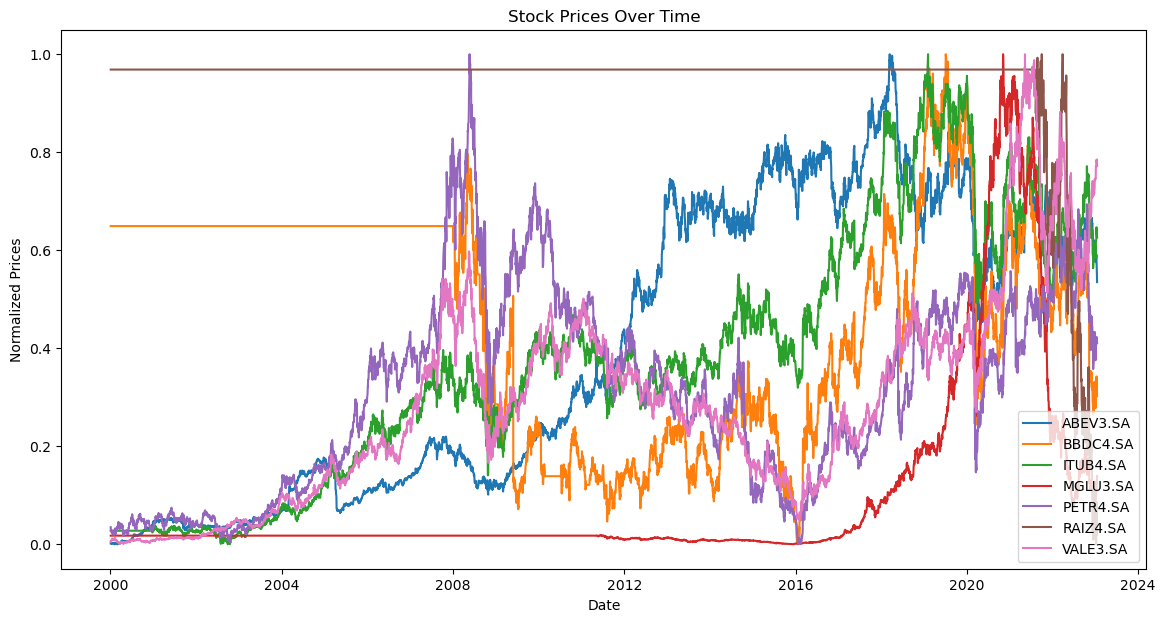

In [17]:
import matplotlib.pyplot as plt
# Plotting the time series data for all stocks
plt.figure(figsize=(14, 7))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], label=column)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Prices')
plt.legend()
plt.show()

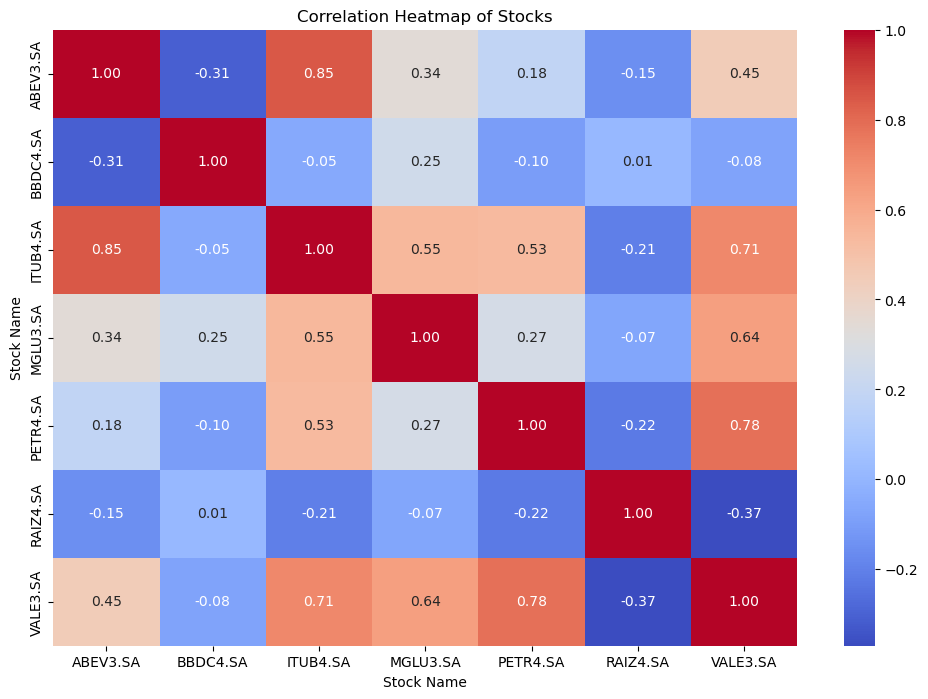

In [19]:
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Stocks')
plt.show()

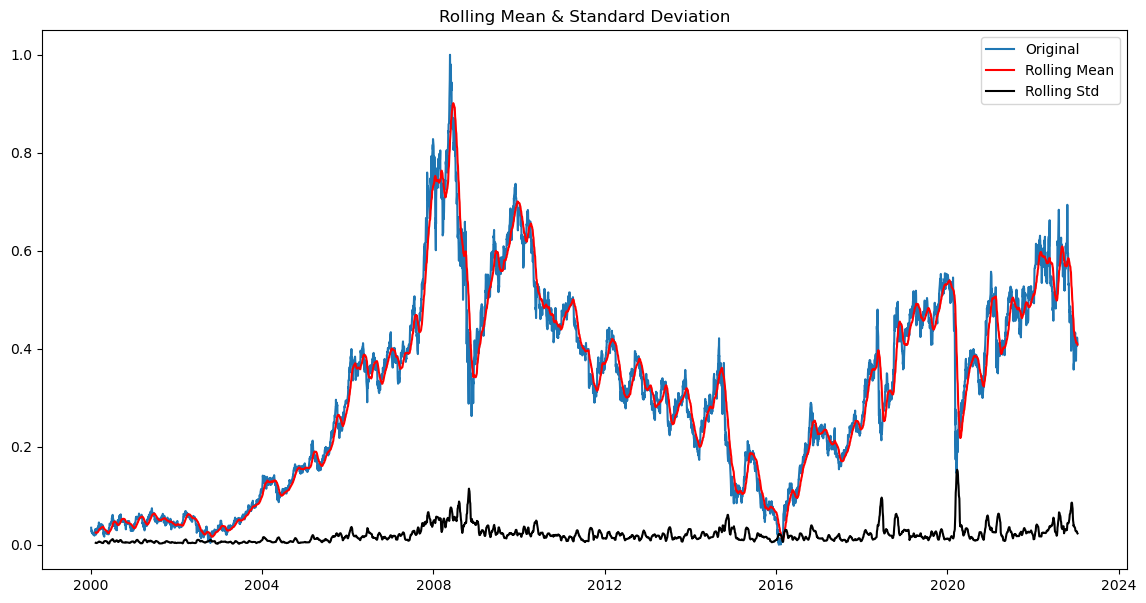

In [20]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
# Plot rolling statistics
rolling_mean = scaled_df.rolling(window=30).mean()
rolling_std = scaled_df.rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(scaled_df.index, scaled_df['PETR4.SA'], label='Original')
plt.plot(rolling_mean.index, rolling_mean['PETR4.SA'], label='Rolling Mean', color='red')
plt.plot(rolling_std.index, rolling_std['PETR4.SA'], label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

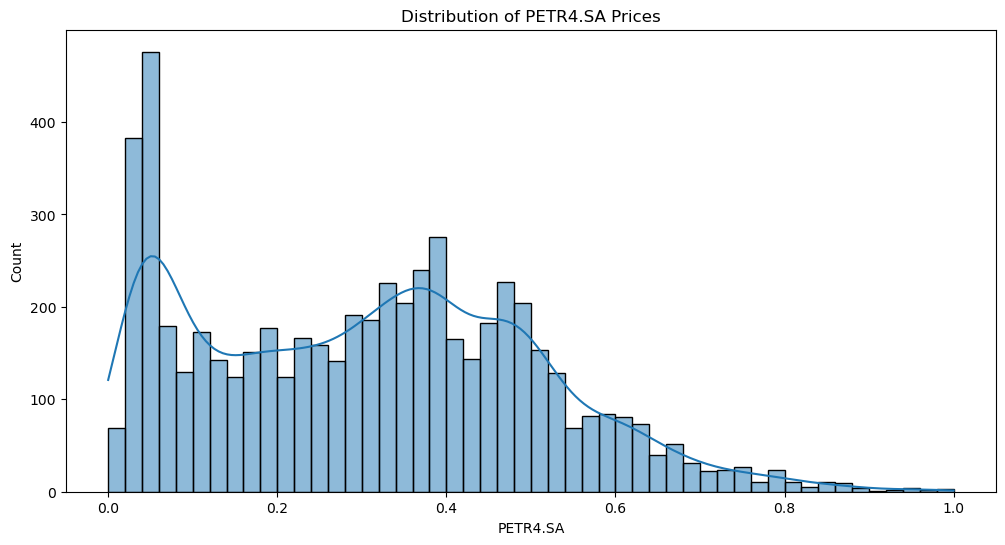

In [21]:
# Distribution plot for a specific stock
plt.figure(figsize=(12, 6))
sns.histplot(scaled_df['PETR4.SA'], bins=50, kde=True)
plt.title('Distribution of PETR4.SA Prices')
plt.show()